In [ ]:
pip install pandas scikit-learn


In [ ]:
# Mount Google Drive to access files if needed
from google.colab import drive
drive.mount('/content/drive'drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Mount Google Drive to access files if needed
from google.colab import drive
drive.mount('/content/drive')

# Load dataset from CSV file
csv_file_path = "/content/drive/MyDrive/dataset.csv"
df = pd.read_csv(csv_file_path)

# Display first few rows of the DataFrame
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (replace NaNs with mean)
df.fillna(df.mean(), inplace=True)

# Convert categorical variables to numerical format (one-hot encoding)
df = pd.get_dummies(df, columns=['Product ID', 'Type'])

# Split data into features (X) and target labels (y)
X = df.drop(columns=['Machine failure'])
y = df['Machine failure']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408        

<ipython-input-6-d2f913ae089d>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


X_train shape: (8000, 10014)
y_train shape: (8000,)
X_test shape: (2000, 10014)
y_test shape: (2000,)


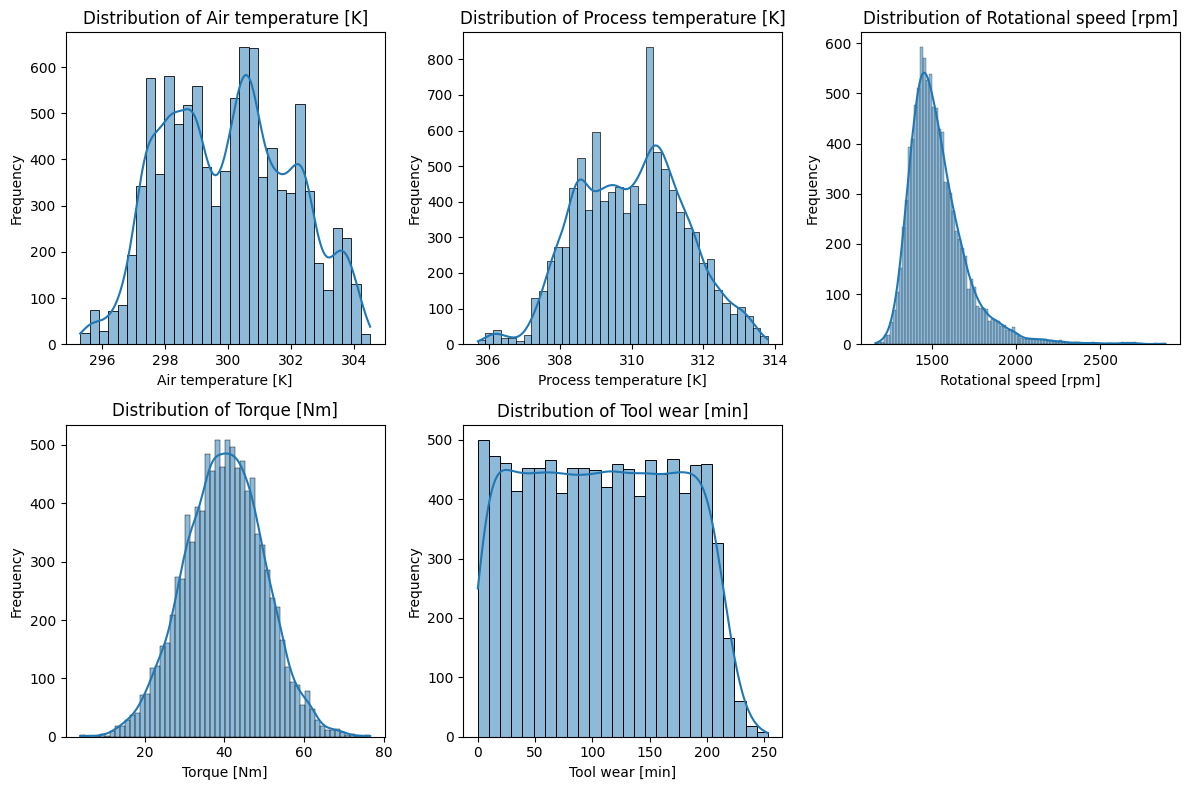

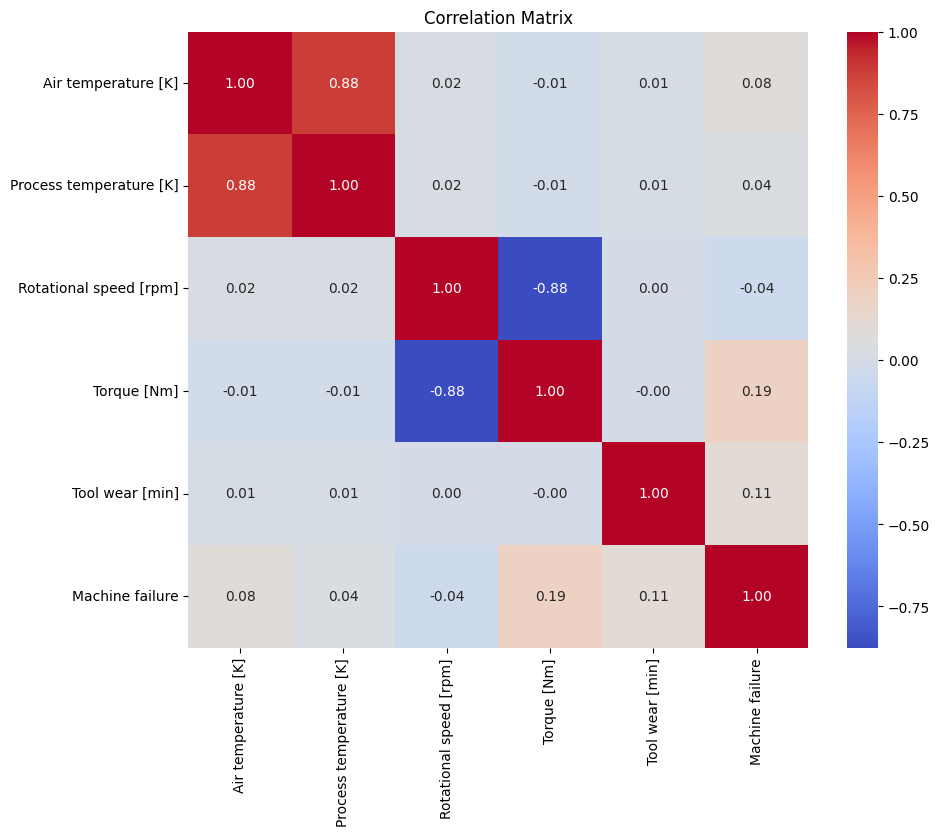

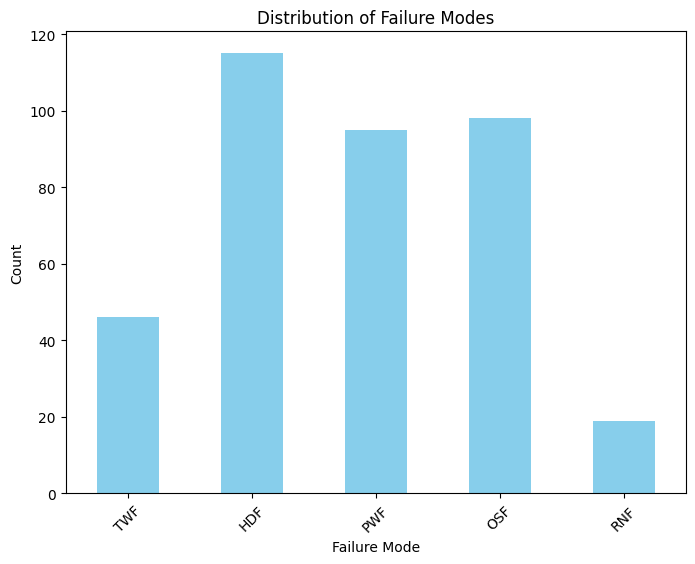

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature distributions
numerical_features = ['Air temperature [K]', 'Process temperature [K]',
                      'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Explore correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features + ['Machine failure']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Analyze failure modes
failure_modes = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = df[failure_modes].sum()

plt.figure(figsize=(8, 6))
failure_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Failure Modes')
plt.xlabel('Failure Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/dataset.csv")

# Display the correlation matrix
corr_matrix = data.corr()
print("Correlation Matrix:")
print(corr_matrix)

# Select relevant features based on correlation coefficients
relevant_features = corr_matrix['Machine failure'].abs().sort_values(ascending=False)
relevant_features = relevant_features[relevant_features != 1].index.tolist()  # Exclude the target variable
print("\nRelevant Features:")
print(relevant_features)

# Perform feature engineering if necessary
# For example, you could create interaction terms or transform existing features based on domain knowledge
# Here, we'll skip feature engineering for simplicity

# Create a new DataFrame with selected features
selected_data = data[relevant_features + ['Machine failure']]

# Display the first few rows of the selected data
print("\nSelected Data:")
print(selected_data.head())


Correlation Matrix:
                              UDI  Air temperature [K]  \
UDI                      1.000000             0.117428   
Air temperature [K]      0.117428             1.000000   
Process temperature [K]  0.324428             0.876107   
Rotational speed [rpm]  -0.006615             0.022670   
Torque [Nm]              0.003207            -0.013778   
Tool wear [min]         -0.010702             0.013853   
Machine failure         -0.022892             0.082556   
TWF                      0.009154             0.009955   
HDF                     -0.022215             0.137831   
PWF                     -0.023557             0.003470   
OSF                     -0.000990             0.001988   
RNF                     -0.005954             0.017688   

                         Process temperature [K]  Rotational speed [rpm]  \
UDI                                     0.324428               -0.006615   
Air temperature [K]                     0.876107                0.022670 

<ipython-input-10-1710310f39d8>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


ML MODELS: Logistic Regression, DecisionTree, RandomForest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into features (X) and target variable (y)
X = selected_data.drop(columns=['Machine failure'])
y = selected_data['Machine failure']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose machine learning algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate the models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)



Training Logistic Regression...

Logistic Regression Performance:
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.71      0.39      0.51        61

    accuracy                           0.98      2000
   macro avg       0.84      0.69      0.75      2000
weighted avg       0.97      0.98      0.97      2000


Training Decision Tree...

Decision Tree Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       0.92      0.97      0.94        61

    accuracy                           1.00      2000
   macro avg       0.96      0.98      0.97      2000
weighted avg       1.00      1.00      1.00      2000


Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
from sklearn.model_selection import cross_val_score

# Model Interpretation
# Let's focus on Random Forest model for feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns.tolist()

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

# Model Validation
# Use cross-validation to validate the Random Forest model
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.2f}")



Feature Importance:
                    Feature  Importance
0                       HDF    0.298250
1                       OSF    0.220132
2                       PWF    0.190578
3                       TWF    0.107203
4               Torque [Nm]    0.059407
7    Rotational speed [rpm]    0.053487
5           Tool wear [min]    0.025059
9                       UDI    0.018183
6       Air temperature [K]    0.017912
8   Process temperature [K]    0.009646
10                      RNF    0.000143

Cross-Validation Scores:
[0.9995 0.999  0.6465 0.998  0.999 ]
Mean Accuracy: 0.93


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Evaluate the model with best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate performance of the best model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nBest Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)



Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best Model Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
import joblib

# Serialize the trained model
model_filename = 'random_forest_model.pkl'
joblib.dump(best_model, model_filename)

# Now, you can load the model whenever you need to make predictions
loaded_model = joblib.load(model_filename)

# Example usage: Make predictions using the loaded model
example_data = X_test.iloc[0]  # Example input data
predicted_class = loaded_model.predict([example_data])
print("Predicted Class:", predicted_class)


Predicted Class: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from flask import Flask, request, jsonify
import joblib

# Load the serialized model
model = joblib.load('random_forest_model.pkl')

# Create Flask app
app = Flask(__name__)

# Define API endpoint for prediction
@app.route('/predict', methods=['POST'])
def predict():
    # Get input data from request
    data = request.get_json()
    # Make prediction using the loaded model
    prediction = model.predict([data])
    # Return prediction as JSON response
    return jsonify({'prediction': prediction.tolist()})

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
from sklearn.model_selection import train_test_split

# Load your original dataset
original_data = pd.read_csv("/content/drive/MyDrive/dataset.csv")

# Split data into features (X) and target labels (y)
X = original_data.drop(columns=["Machine failure"])
y = original_data["Machine failure"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the test data to a CSV file
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv("test_data.csv", index=False)


In [ ]:
import joblib
import pandas as pd

def load_model(model_path):
    """Load the trained model."""
    return joblib.load(model_path)

def load_test_data(test_data_path):
    """Load the test data."""
    return pd.read_csv(test_data_path)

def predict(model, test_data):
    """Make predictions using the trained model."""
    predictions = model.predict(test_data)
    return predictions

def main(model_path, test_data_path):
    """Main function to load model, load test data, make predictions, and print results."""
    # Load trained model
    model = load_model(model_path)

    # Load test data
    test_data = load_test_data(test_data_path)

    # Make predictions
    predictions = predict(model, test_data)

    # Print predictions
    print("Predictions:")
    print(predictions)

# Example usage
if __name__ == "__main__":
    # Update these paths with the actual paths to your model and test data files
    model_path = "/content/random_forest_model.pkl"
    test_data_path = "/content/drive/MyDrive/test_data3.csv"

    main(model_path, test_data_path)


Predictions:
[0 0 0 ... 0 1 0]


In [ ]:
import joblib
import pandas as pd

def load_model(model_path):
    """Load the trained model."""
    return joblib.load(model_path)

def load_test_data(test_data_path):
    """Load the test data."""
    return pd.read_csv(test_data_path)

def predict(model, test_data):
    """Make predictions using the trained model."""
    predictions = model.predict(test_data)
    return predictions

def print_maintenance_predictions(predictions, test_data):
    """Print maintenance predictions for each instance."""
    for i, prediction in enumerate(predictions):
        if prediction == 1:
            print(f"Maintenance required for instance {i}: {test_data.iloc[i]}")
        else:
            print(f"No maintenance required for instance {i}: {test_data.iloc[i]}")

def main(model_path, test_data_path):
    """Main function to load model, load test data, make predictions, and print results."""

    model = load_model(model_path)
    test_data = load_test_data(test_data_path)
    predictions = predict(model, test_data)
    print_maintenance_predictions(predictions, test_data)

# Example usage
if __name__ == "__main__":
    # Update these paths with the actual paths to your model and test data files
    model_path = "/content/random_forest_model.pkl"
    test_data_path = "/content/drive/MyDrive/test_data3.csv"

    main(model_path, test_data_path)


Streaming output truncated to the last 5000 lines.
Torque [Nm]                  39.8
Tool wear [min]              48.0
Air temperature [K]         299.6
Rotational speed [rpm]     1577.0
Process temperature [K]     309.3
UDI                        2184.0
RNF                           0.0
Name: 1583, dtype: float64
No maintenance required for instance 1584: HDF                           0.0
OSF                           0.0
PWF                           0.0
TWF                           0.0
Torque [Nm]                  23.0
Tool wear [min]             242.0
Air temperature [K]         300.6
Rotational speed [rpm]     1867.0
Process temperature [K]     309.5
UDI                        2863.0
RNF                           0.0
Name: 1584, dtype: float64
No maintenance required for instance 1585: HDF                           0.0
OSF                           0.0
PWF                           0.0
TWF                           0.0
Torque [Nm]                  16.6
Tool wear [min]            

In [ ]:
import joblib
import pandas as pd

def load_model(model_path):
    """Load the trained model."""
    return joblib.load(model_path)

def load_test_data(test_data_path):
    """Load the test data."""
    return pd.read_csv(test_data_path)

def predict(model, test_data):
    """Make predictions using the trained model."""
    predictions = model.predict(test_data)
    return predictions

def print_maintenance_required(predictions, test_data):
    """Print details of instances where maintenance is required."""
    for i, prediction in enumerate(predictions):
        if prediction == 1:
            print(f"Maintenance required for instance {i}")

def main(model_path, test_data_path):
    """Main function to load model, load test data, make predictions, and print maintenance requirements."""
    # Load trained model
    model = load_model(model_path)

    # Load test data
    test_data = load_test_data(test_data_path)

    # Make predictions
    predictions = predict(model, test_data)

    # Print maintenance requirements
    print_maintenance_required(predictions, test_data)

# Example usage
if __name__ == "__main__":
    # Update these paths with the actual paths to your model and test data files
    model_path = "/content/random_forest_model.pkl"
    test_data_path = "/content/drive/MyDrive/test_data3.csv"

    main(model_path, test_data_path)


Maintenance required for instance 5
Maintenance required for instance 95
Maintenance required for instance 113
Maintenance required for instance 119
Maintenance required for instance 124
Maintenance required for instance 127
Maintenance required for instance 156
Maintenance required for instance 201
Maintenance required for instance 202
Maintenance required for instance 245
Maintenance required for instance 287
Maintenance required for instance 326
Maintenance required for instance 331
Maintenance required for instance 342
Maintenance required for instance 368
Maintenance required for instance 429
Maintenance required for instance 518
Maintenance required for instance 553
Maintenance required for instance 559
Maintenance required for instance 565
Maintenance required for instance 668
Maintenance required for instance 697
Maintenance required for instance 727
Maintenance required for instance 732
Maintenance required for instance 748
Maintenance required for instance 794
Maintenance req

In [ ]:
import joblib
import pandas as pd

def load_model(model_path):
    """Load the trained model."""
    return joblib.load(model_path)

def load_test_data(test_data_path):
    """Load the test data."""
    return pd.read_csv(test_data_path)

def predict(model, test_data):
    """Make predictions using the trained model."""
    predictions = model.predict(test_data)
    return predictions

def detect_maintenance_required(predictions, test_data):
    """Identify instances where maintenance is required."""
    threshold = 300  # Adjust this value as per your requirements

    for i, prediction in enumerate(predictions):
        if prediction == 1:  # Maintenance required
            instance = test_data.iloc[i]
            print(f"Maintenance required for instance {i}:")
            print(f"UDI: {instance['UDI']}")
            for metric in ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']:
                if instance[metric] > threshold:  # Compare with the threshold
                    print(f"- Unusual {metric}: {instance[metric]}")

def main(model_path, test_data_path):
    """Main function to load model, load test data, make predictions, and detect maintenance."""
    # Load trained model
    model = load_model(model_path)

    # Load test data
    test_data = load_test_data(test_data_path)

    # Make predictions
    predictions = predict(model, test_data)

    # Detect maintenance required instances
    detect_maintenance_required(predictions, test_data)

# Example usage
if __name__ == "__main__":
    model_path = "/content/random_forest_model.pkl"
    test_data_path = "/content/drive/MyDrive/test_data3.csv"

    main(model_path, test_data_path)


Maintenance required for instance 5:
UDI: 6341.0
- Unusual Air temperature [K]: 300.5
- Unusual Process temperature [K]: 309.9
- Unusual Rotational speed [rpm]: 1397.0
Maintenance required for instance 95:
UDI: 3788.0
- Unusual Air temperature [K]: 302.3
- Unusual Process temperature [K]: 310.8
- Unusual Rotational speed [rpm]: 1377.0
Maintenance required for instance 113:
UDI: 1124.0
- Unusual Process temperature [K]: 307.7
- Unusual Rotational speed [rpm]: 1386.0
Maintenance required for instance 119:
UDI: 4072.0
- Unusual Air temperature [K]: 301.9
- Unusual Process temperature [K]: 310.6
- Unusual Rotational speed [rpm]: 1331.0
Maintenance required for instance 124:
UDI: 3351.0
- Unusual Air temperature [K]: 301.4
- Unusual Process temperature [K]: 310.8
- Unusual Rotational speed [rpm]: 1285.0
Maintenance required for instance 127:
UDI: 4082.0
- Unusual Air temperature [K]: 302.0
- Unusual Process temperature [K]: 310.4
- Unusual Rotational speed [rpm]: 1336.0
Maintenance required

Codes for Attribute Identification of Dataset

In [ ]:
import joblib

# Load the trained model
model = joblib.load('random_forest_model.pkl')

# Get the feature names
feature_names = model.feature_names_in_

# Print the feature names
print("Feature Names:")
print(feature_names)


Feature Names:
['HDF' 'OSF' 'PWF' 'TWF' 'Torque [Nm]' 'Tool wear [min]'
 'Air temperature [K]' 'Rotational speed [rpm]' 'Process temperature [K]'
 'UDI' 'RNF']


In [ ]:
import pandas as pd

# Load test data CSV file
test_data = pd.read_csv("/content/drive/MyDrive/test_data3.csv")

# Get column names
column_names = test_data.columns

# Print column names
print("Column Names:")
print(column_names)


Column Names:
Index(['HDF', 'OSF', 'PWF', 'TWF', 'Torque [Nm]', 'Tool wear [min]',
       'Air temperature [K]', 'Rotational speed [rpm]',
       'Process temperature [K]', 'UDI', 'RNF'],
      dtype='object')


In [ ]:
import pandas as pd

# Load test data CSV file
test_data = pd.read_csv("test_data.csv")

# Get column names
column_names = test_data.columns

# Print column names
print("Column Names:")
print(column_names)


Column Names:
Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Machine failure'],
      dtype='object')
